# Evaluate surface tracing

This notebook compares the results of two different approaches to surface tracing:

- Approach 1: Matlab code published [here](https://github.com/campaslab/STRESS)
- Approach2: Napari surface tracing demonstrated in [this notebook ](./Process_confocal.ipynb)

In [27]:
import numpy as np
from scipy import io
import os

import napari_stress
from napari_stress._utils import time_slicer

import napari
import matplotlib.pyplot as plt

In [19]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


In [5]:
root = r'C:\Users\johamuel\Documents\BiAPoL\Shared\BiAPoLprojects\20_STRESS\1_first_data'

matlab_results = os.path.join(root, 
                             'results_matlab_code',
                             'ExampleTifSequence-InteriorLabel--21timesteps_analyzed',
                             'CoordsAndCurves_2022_4_28_14_59')

In [6]:
matlab_data = []

for f in os.listdir(matlab_results):
    matlab_data.append(io.loadmat(os.path.join(matlab_results, f)))

The matlab results are loaded as a Python dictionary with the following column headers:

In [13]:
matlab_data[0].keys()

dict_keys(['__header__', '__version__', '__globals__', 'pointCloudArray', 'meanCurvatureArray', 'data'])

We are obviously interested in the `pointCloudArray` array and the `meanCurvatureArray`.

In [25]:
matlab_points = [x['pointCloudArray'] for x in matlab_data]
matlab_mean_curvatures = [x['meanCurvatureArray'] for x in matlab_data]

We could first ask ourselves: by how many points is the surface characterized?

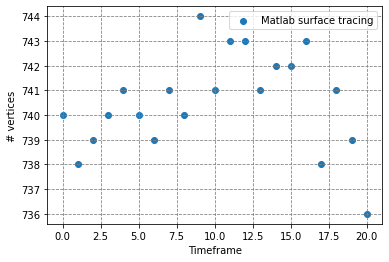

In [31]:
n_verts = [len(x) for x in matlab_points]
fig, ax = plt.subplots()
ax.scatter(np.arange(len(n_verts)), n_verts, label = 'Matlab surface tracing')
ax.set_xlabel('Timeframe')
ax.set_ylabel('# vertices')
ax.grid(which='major', linestyle='--', color='gray')
ax.legend()

In [32]:
Converter = time_slicer.Converter()
matlab_points = Converter.list_of_data_to_data(matlab_points, layertype=napari.types.PointsData)

In [24]:
matlab_points

array([[ 0.        , 17.13968199, 18.85632569, 20.94506796],
       [ 0.        , 17.28743999, 18.51846887, 20.91139544],
       [ 0.        , 17.68266817, 18.88726768, 20.8310964 ],
       ...,
       [20.        , 13.37882251, 15.75597412,  7.84409976],
       [20.        , 13.7247176 , 14.95376525,  7.89900877],
       [20.        , 14.16745682, 15.45442506,  7.81662381]])